# 데이터 크롤링과 정제


# ONE. 첫 번째 웹 스크레이퍼

웹 페이지 가져오기

In [ ]:
from urllib.request import urlopen

html = urlopen('https://www.daangn.com/hot_articles')
print(type(html))
print(html.read())

<class 'http.client.HTTPResponse'>
b'<!DOCTYPE html>\n<html lang="ko">\n<head>\n  <meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n  <meta name="viewport" content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=no">\n\n\n\n<title>\xeb\x8b\xb9\xea\xb7\xbc \xec\xa4\x91\xea\xb3\xa0\xea\xb1\xb0\xeb\x9e\x98 | \xeb\x8b\xb9\xec\x8b\xa0 \xea\xb7\xbc\xec\xb2\x98\xec\x9d\x98 \xeb\x8b\xb9\xea\xb7\xbc</title>\n<meta name="description" content="\xeb\x8b\xb9\xea\xb7\xbc\xec\x97\x90\xec\x84\x9c \xea\xb1\xb0\xeb\x9e\x98\xeb\x90\x98\xeb\x8a\x94 \xec\x9d\xb8\xea\xb8\xb0 \xec\xa4\x91\xea\xb3\xa0 \xeb\xa7\xa4\xeb\xac\xbc\xec\x9d\x84 \xec\x86\x8c\xea\xb0\x9c\xed\x95\xa9\xeb\x8b\x88\xeb\x8b\xa4. \xec\xa7\x80\xea\xb8\x88 \xeb\x8b\xb9\xea\xb7\xbc\xec\x97\x90\xec\x84\x9c \xea\xb1\xb0\xeb\x9e\x98\xeb\x90\x98\xea\xb3\xa0 \xec\x9e\x88\xeb\x8a\x94 \xeb\x8b\xa4\xec\x96\x91\xed\x95\x9c \xeb\xa7\xa4\xeb\xac\xbc\xec\x9d\x84 \xea\xb5\xac\xea\xb2\xbd\xed\x95\xb4\xeb\xb3\xb

In [ ]:
pip list beautifulsoup

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
accelerate                       0.32.1
aiohappyeyeballs                 2.3.4
aiohttp                          3.10.1
aiosignal                        1.3.1
alabaster                        0.7.16
albucore                         0.0.13
albumentations                   1.4.12
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.18.0
asn1crypto                       1.5.1
astropy                          6.1.2
astropy-iers-data                0.2024.8.5.0.32.23
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            24.1.0
audioread               

BeautifulSoup 라이브러리

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup


In [ ]:
html = urlopen('http://www.pythonscraping.com/pages/page1.html')

# 생성된 객체 - 클래스의 생성자 -> 객체 생성
bs=BeautifulSoup(html.read(), 'html.parser')
# 파싱 : 컴퓨터에서 컴파일러가 원시 부호를 기계어로 번역하는 과정의 한 단계로
#        각 문장의 문법적인 구성 또는 구문 분석하는 과정
print(bs)
print()

print(bs.h1) # 웹사이트에서 첫 번째 <h1>태그만 반환
print()

print(bs.h1.string) # .string:	태그 내부의 문자열만 가져옴
print(bs.h1.text) # string과 동일하게 본문 내용 가져옴

<html>
<head>
<title>A Useful Page</title>
</head>
<body>
<h1>An Interesting Title</h1>
<div>
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.
</div>
</body>
</html>


<h1>An Interesting Title</h1>

An Interesting Title
An Interesting Title


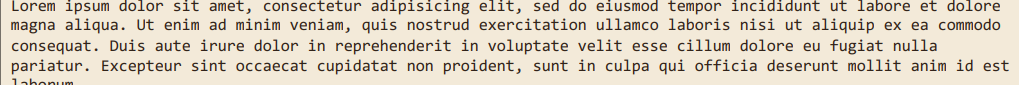

- 내부 문자열

신뢰할 수 있는 연결과 예외 처리

In [ ]:
from urllib.request import urlopen
from urllib.error import HTTPError
from urllib.error import URLError

try:
  html = urlopen('http://www.pythonscraping.com/pages/error.html') # 서버는 정상동작 하지만 url 존재 x
except HTTPError as e:
  print(e)
except URLError as e:
  print('The servver could not be found !')
else:
  print('it worked')


HTTP Error 404: Not Found


- 페이지를 찾을 수 없는 경우
  - 404	Page	Not	Found 에러 발생:	HTTPError 예외 발생 시킴
- 서버를 찾을 수 없는 경우
  -  500	Internal	Server	Error		발생시 URLError 예외 발생 시킴

존재하지 않는 태그 예외 처리

In [ ]:
from urllib.request import urlopen
from urllib.error import HTTPError
from bs4 import BeautifulSoup

def getTitle(url, tag):
  try:
    html=urlopen(url)
  except HTTPError as e:
    return None

  try:
    bsObj = BeautifulSoup(html.read(), 'html.parser')
    value = bsObj.body.find(tag)
  except AttributeError as e:
    return None

  return value

tag = 'h2'
value=getTitle('http://www.pythonscraping.com/pages/page1.html',tag)

if value==None:
  print(f'{tag} could not be found')

else:
  print(value)

h2 could not be found


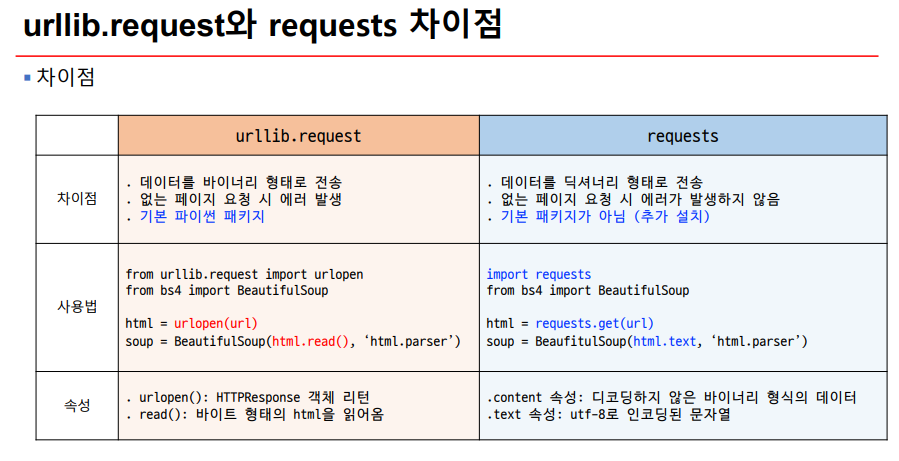

- urllib.request
  -  post 방식 : 웹서버로 데이터 전송
    - http body에 데이터 담음
- requests
  - get 방식 : http packet header에 데이터 담음

requests 모듈 사용 예제

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'http://www.pythonscraping.com/pages/page1.html'
html = requests.get(url)
print('html.encoding:', html.encoding)
print(html.text)

soup = BeautifulSoup(html.text, 'html.parser')
print()
print('h1.string:', soup.h1.string)

html.encoding: ISO-8859-1
<html>
<head>
<title>A Useful Page</title>
</head>
<body>
<h1>An Interesting Title</h1>
<div>
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.
</div>
</body>
</html>


h1.string: An Interesting Title


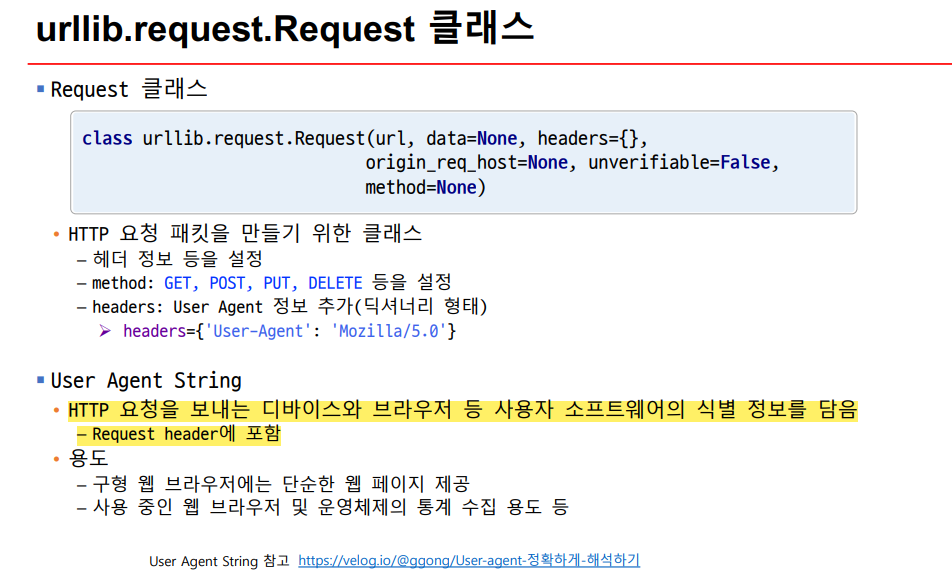

- 사용자 정보를 담기 위해 사용

멜론 웹사이트 접근

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

melon_url='https://www.melon.com/chart/index.htm' # 옛날 형식 윈도우 # html : 리눅스
html=urlopen(melon_url)

soup=BeautifulSoup(html.read(), 'html.parser')
print(soup)

HTTPError: HTTP Error 406: Not Acceptable

-> HTTP	Error	406: Not	Acceptable
  - 사람이 아닌 로봇으로 인식해서 크롤링을 막음
  - User	Agent 정보가 없음

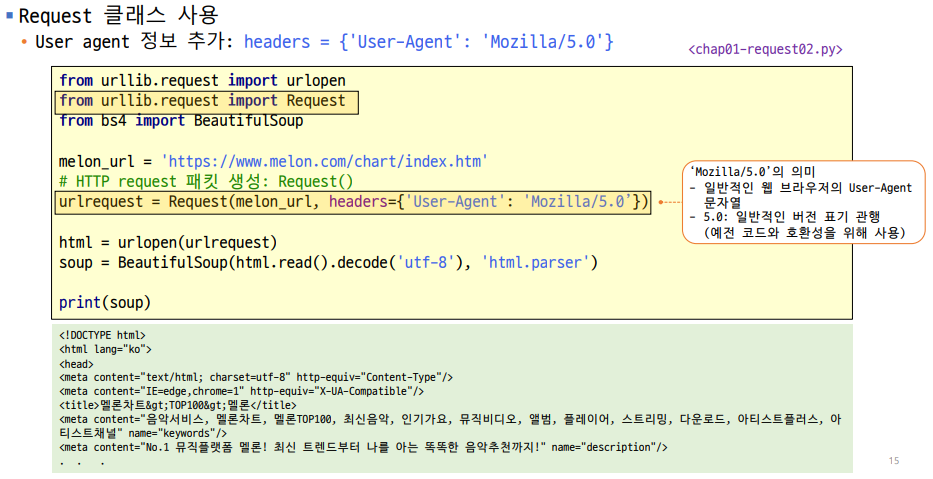

- User-Agent는 url 생성 전에 먼저 만들어야 함

In [ ]:
from urllib.request import urlopen
from urllib.request import Request
from bs4 import BeautifulSoup

melon_url='https://www.melon.com/chart/index.htm'

#	HTTP	request	패킷 생성:	Request()
url_request = Request(melon_url, headers={'User-Agent' : 'Mozilla/5.0'})
# User-Agent 형식 지키기

html=urlopen(url_request)

soup=BeautifulSoup(html.read().decode('utf-8'), 'html.parser')
print(soup)

[<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>, <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>, <title>멜론차트&gt;TOP100&gt;멜론</title>, <meta content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" name="keywords"/>, <meta content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" name="description"/>, <meta content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" name="naver-site-verification"/>, <meta content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" name="google-site-verification"/>, <meta content="357952407588971" property="fb:app_id"/>, <meta content="Melon" property="og:title"/>, <meta content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png" property="og:image"/>, <meta content="음악이 필요한 순간, 멜론" property="og:description"/>, <meta content="http://www.melon.com/chart/index.htm" property="og:url"/>, <meta content="website" property="og:type"/>, <meta content="멜론" property="og:site_name"/>, <meta 

User-Agent 사용 비교: urllib.request, requests

In [ ]:
from urllib.request import urlopen
from urllib.request import Request
from bs4 import BeautifulSoup
import requests

def use_urlopen(url):
  url_request = Request(url, headers={'User-Agent':'Mozilla/5.0'})
  html = urlopen(url_request)
  # urllib.request 모듈 사용

  soup = BeautifulSoup(html.read().decode('utf-8'), 'html.parser')
  print(soup)

def use_requests(url):
  response = requests.get(url, headers={'User-Agent':'Mozilla/5.0'})
  soup = BeautifulSoup(response.text, 'html.parser')
  # requests 모듈 사용

  print(soup)

def main():
  melon_url = 'https://www.melon.com/chart/index.htm'
  use_urlopen(melon_url)
  use_requests(melon_url)



## HTML & CSS

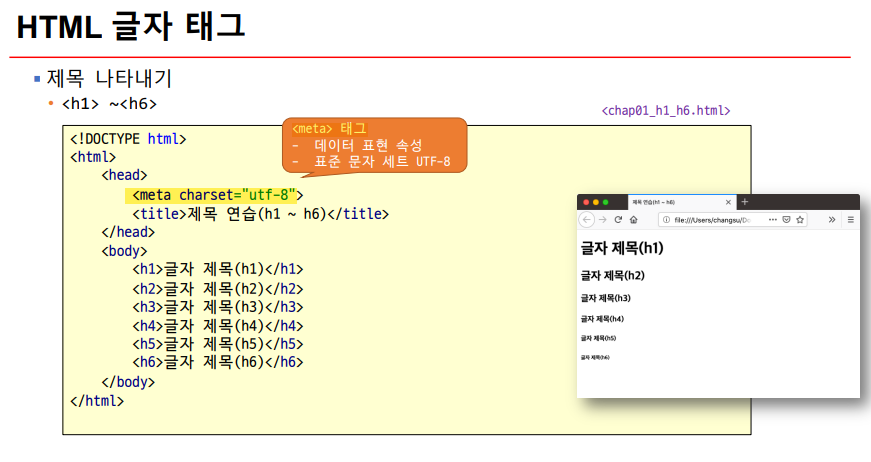

단락 구분 태그

: \<p> ... \</p>

- \<p>\<i> : 기울어져있음 (iteric)

줄 바꿈과 공백

- \<br>	태그
  - 줄 바꿈 태그
  - break line

- \&nbsp;
  - 공백 문자 (non-breaking	space의 약자)
  - 스페이스는 개수와 상관없이 1개만 표시

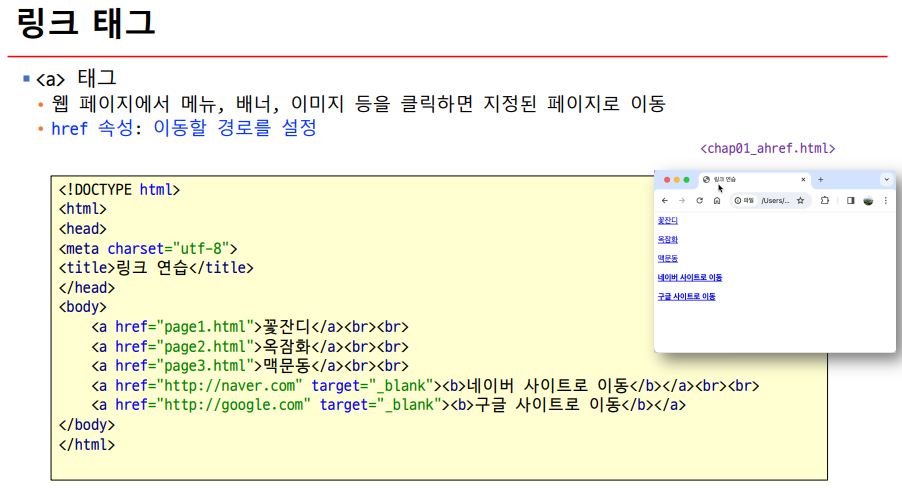

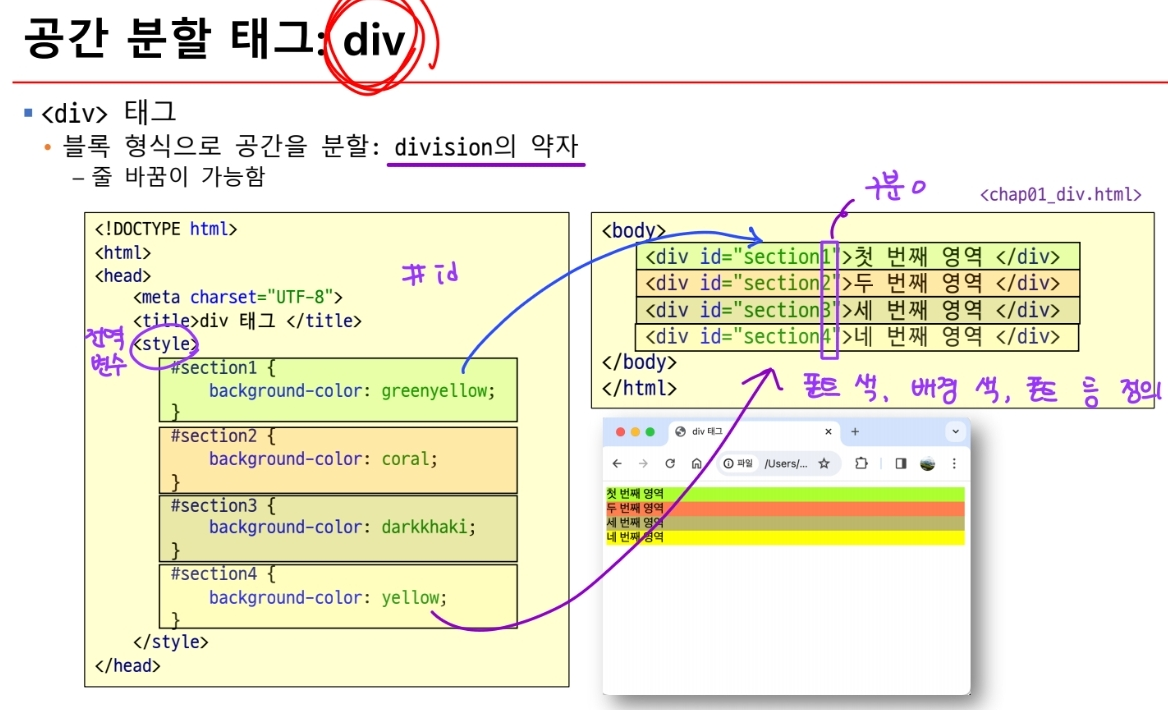


- \<span>태그
  - 인라인(inline) 형식으로 공간 분할
  - 줄 바꿈이 되지 않음

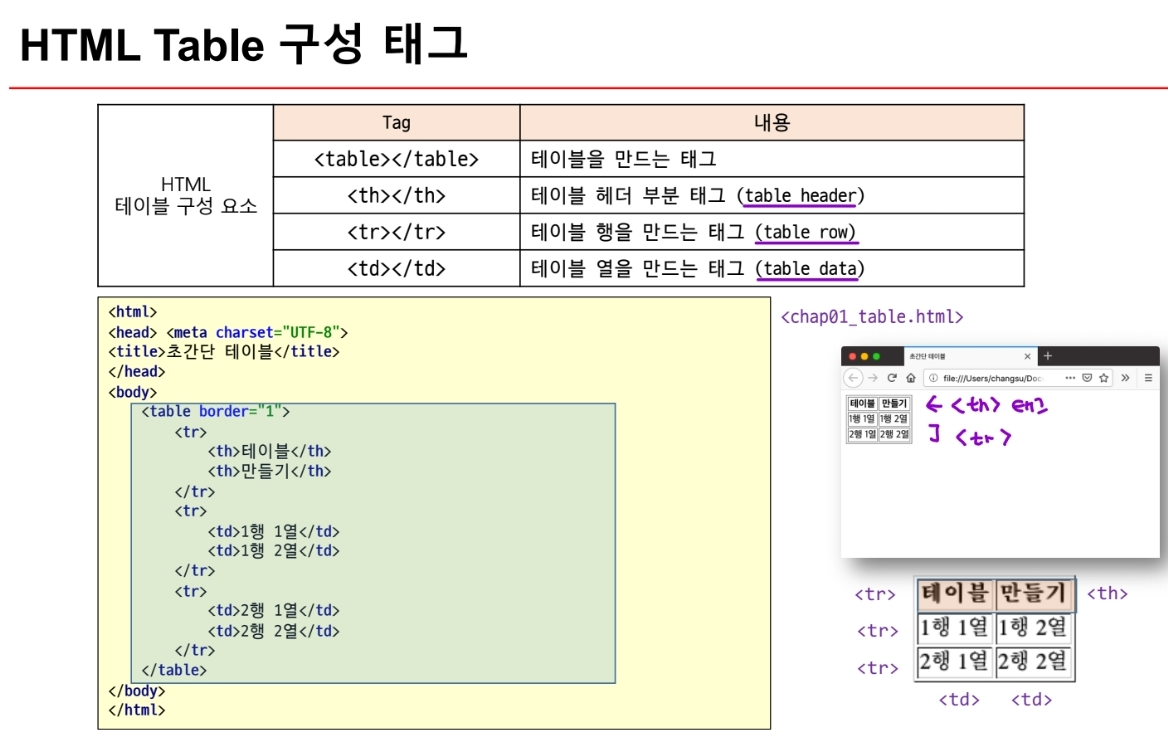

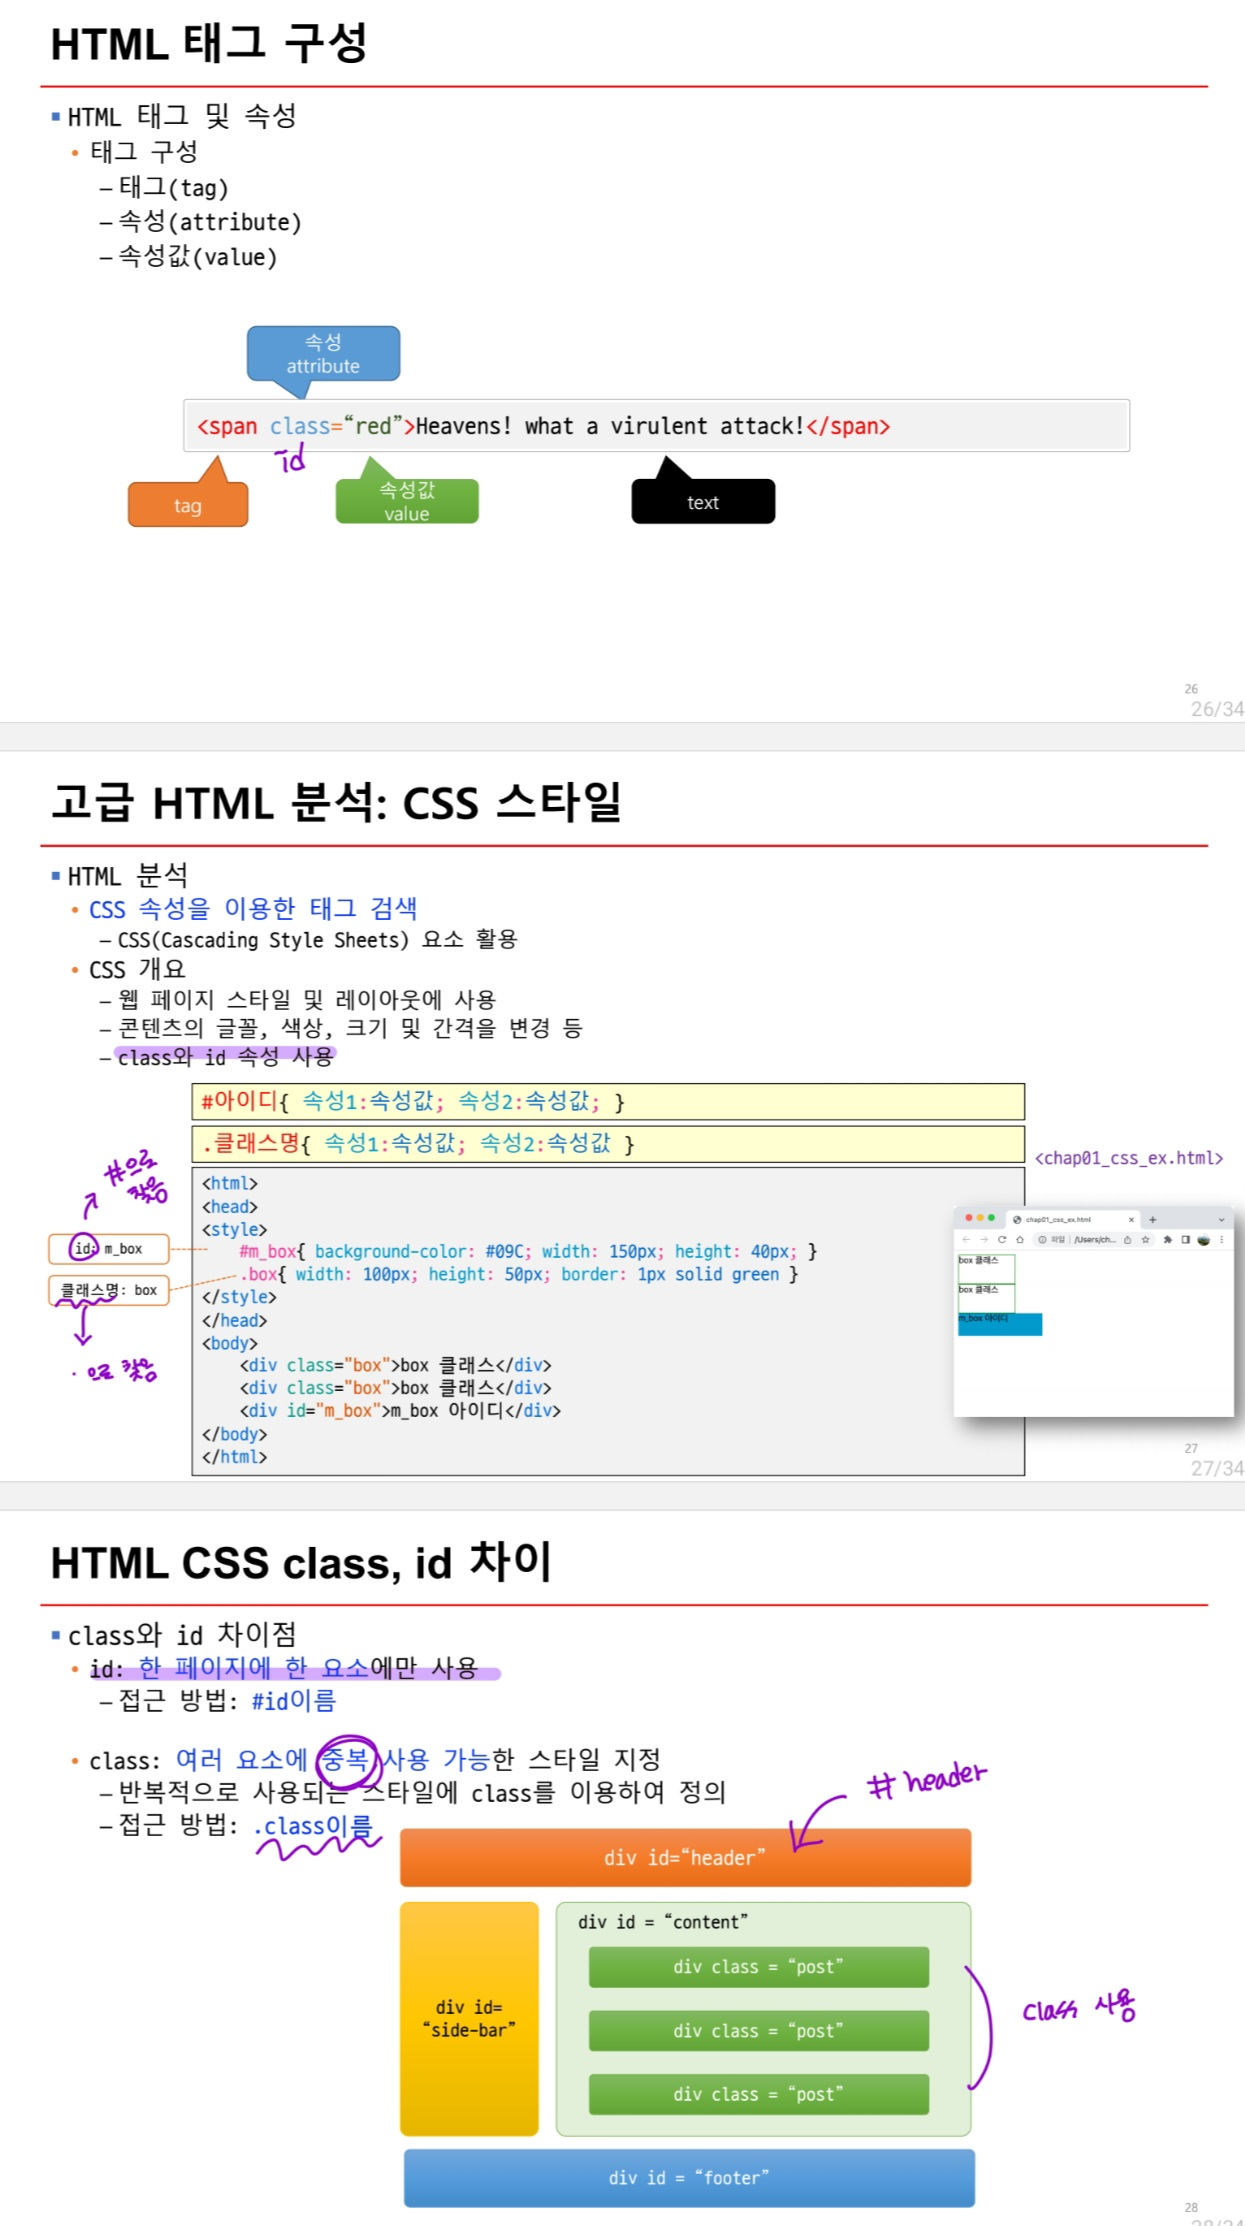

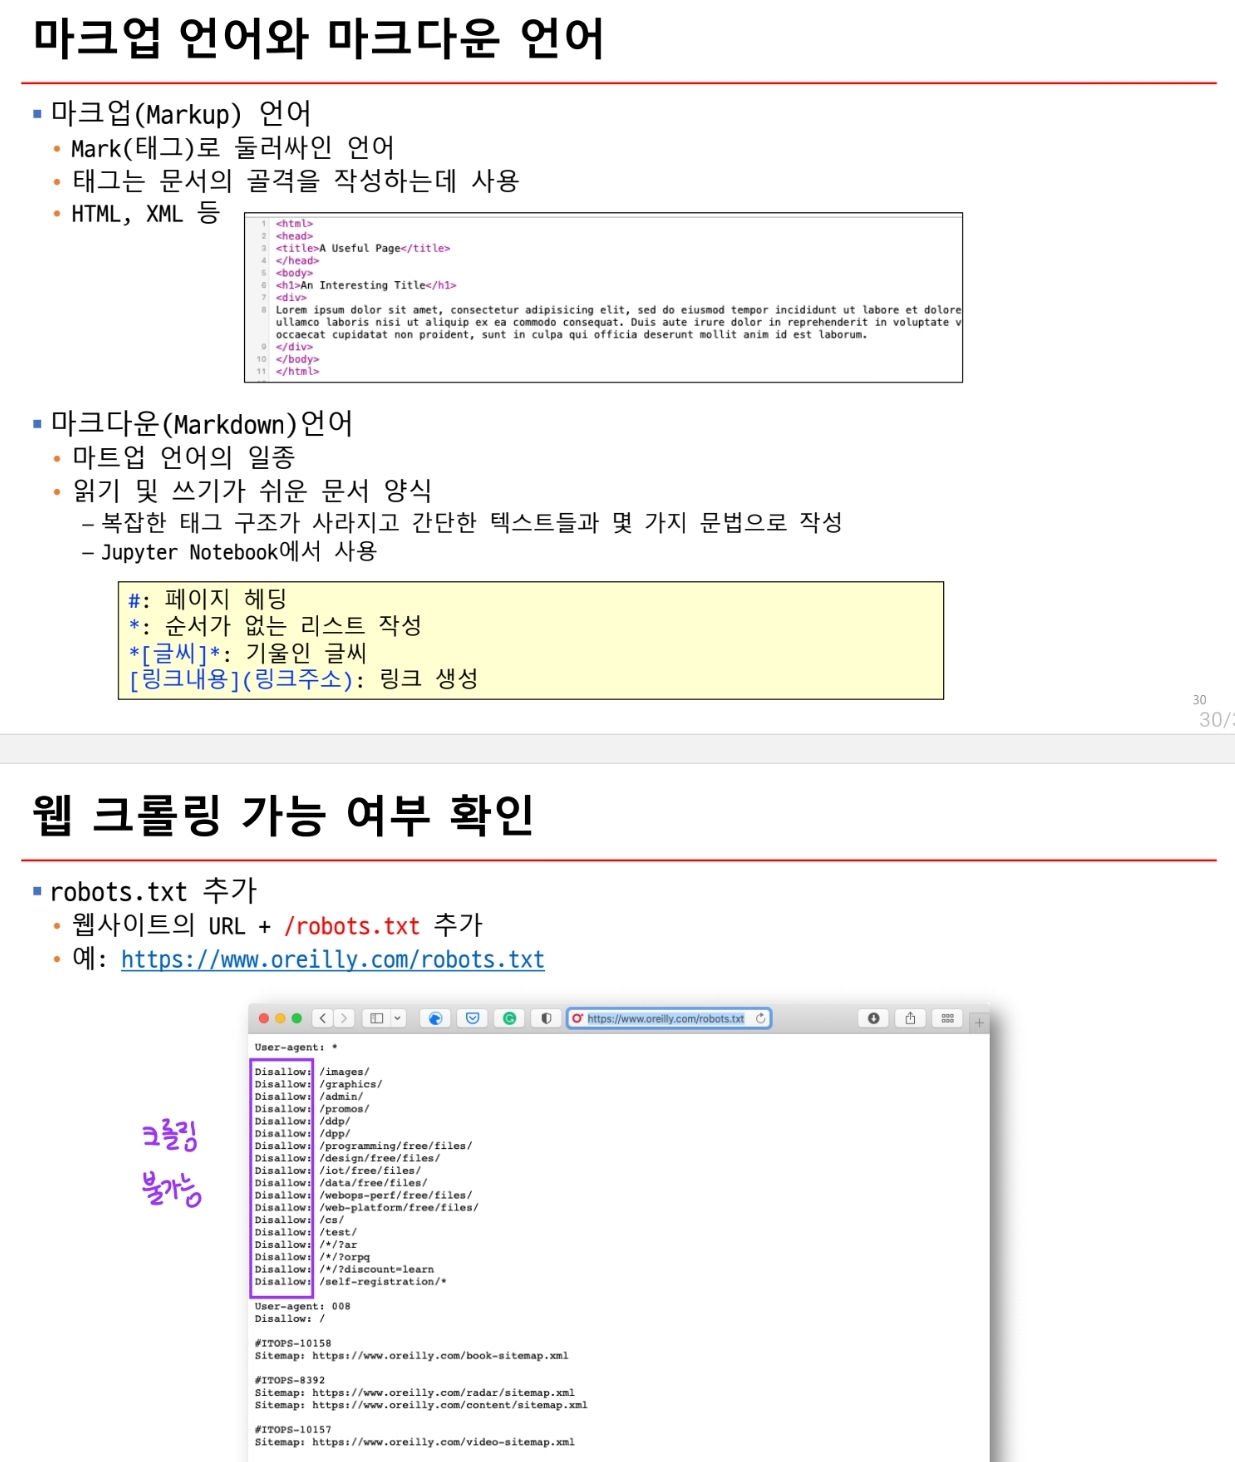

# TWO. BeautifulSoup 활용

BeautifulSoup 첫 예제

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('https://www.daangn.com/hot_articles')
bs = BeautifulSoup(html.read(), 'html.parser')

print(bs.h1)
print(bs.h1.string.strip())

<h1 class="head-title" id="hot-articles-head-title">
      
      
      중고거래 인기매물
  </h1>
중고거래 인기매물


BeautifulSoup 기초 #1: 샘플 HTML 구성

In [ ]:
html_example = '''
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>BeautifulSoup 활용</title>
</head>
<body>
    <h1 id="heading">Heading 1</h1>
    <p>Paragraph</p>
    <span class="red">BeautifulSoup Library Examples!</span>
    <div id="link">
        <a class="external_link" href="www.google.com">google</a>

        <div id="class1">
            <p id="first">class1's first paragraph</p>
            <a class="external_link" href="www.naver.com">naver</a>

            <p id="second">class1's second paragraph</p>
            <a class="internal_link" href="/pages/page1.html">Page1</a>
            <p id="third">class1's third paragraph</p>
        </div>
    </div>
    <div id="text_id2">
        Example page
        <p>g</p>
    </div>
    <h1 id="footer">Footer</h1>

</body>
</html>

'''

BeautifulSoup 기초 #2

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_example, 'html.parser')

print(soup.title)
print(soup.title.string)
print(soup.title.get_text())

<title>BeautifulSoup 활용</title>
BeautifulSoup 활용
BeautifulSoup 활용


In [ ]:
print(soup.title.parent)

<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<title>BeautifulSoup 활용</title>
</head>


BeautifulSoup 기초

In [ ]:
print(soup.body)

<body>
<h1 id="heading">Heading 1</h1>
<p>Paragraph</p>
<span class="red">BeautifulSoup Library Examples!</span>
<div id="link">
<a class="external_link" href="www.google.com">google</a>
<div id="class1">
<p id="first">class1's first paragraph</p>
<a class="external_link" href="www.naver.com">naver</a>
<p id="second">class1's second paragraph</p>
<a class="internal_link" href="/pages/page1.html">Page1</a>
<p id="third">class1's third paragraph</p>
</div>
</div>
<div id="text_id2">
        Example page
        <p>g</p>
</div>
<h1 id="footer">Footer</h1>
</body>


In [ ]:
print(soup.h1)
print(soup.h1.string)

<h1 id="heading">Heading 1</h1>
Heading 1


In [ ]:
print(soup.a)
print(soup.a.string)
print(soup.a['href'])
print(soup.a.get('href'))

<a class="external_link" href="www.google.com">google</a>
google
www.google.com
www.google.com


find() 함수
- 일치하는 첫 번째 요소 출력

In [ ]:
print(soup.find('div'))

<div id="link">
<a class="external_link" href="www.google.com">google</a>
<div id="class1">
<p id="first">class1's first paragraph</p>
<a class="external_link" href="www.naver.com">naver</a>
<p id="second">class1's second paragraph</p>
<a class="internal_link" href="/pages/page1.html">Page1</a>
<p id="third">class1's third paragraph</p>
</div>
</div>


In [ ]:
print(soup.find('div',{'id':'text_id2'}))

<div id="text_id2">
        Example page
        <p>g</p>
</div>


In [ ]:
div_text = soup.find('div',{'id':'text_id2'})
print(div_text.text)


        Example page
        g



In [ ]:
print(div_text.string) # <div> 태그 내부에 한 개 이상의 child 태그를 가지면 None 리턴

None


In [ ]:
href_link = soup.find('a',{'class':'internal_link'})
href_link = soup.find('a',class_ = 'internal_link')

print(href_link)
print(href_link['href'])
print(href_link.get('href'))
print(href_link.text)

<a class="internal_link" href="/pages/page1.html">Page1</a>
/pages/page1.html
/pages/page1.html
Page1


find() 함수
- 일치하는 모든 요소 출력

In [ ]:
print('href_link.attrs : ', href_link.attrs)
print('class 속성값 :', href_link['class'])

print('values() :', href_link.attrs.values())

values = list(href_link.attrs.values())
print(f'values[0]:{values[0]}, values[1]:{values[1]}')

href_link.attrs :  {'class': ['internal_link'], 'href': '/pages/page1.html'}
class 속성값 : ['internal_link']
values() : dict_values([['internal_link'], '/pages/page1.html'])
values[0]:['internal_link'], values[1]:/pages/page1.html


In [ ]:
href_value=soup.find(attrs={'href':'www.google.com'})
href_value=soup.find('a',attrs={'href':'www.google.com'})

print('href_value: ', href_value)
print(href_value['href'])
print(href_value.string)

href_value:  <a class="external_link" href="www.google.com">google</a>
www.google.com
google


In [ ]:
span_tag= soup.find('span')

print('span tag :', span_tag)
print('attrs : ', span_tag.attrs)
print('value : ', span_tag.attrs['class'])
print('text :', span_tag.text)

span tag : <span class="red">BeautifulSoup Library Examples!</span>
attrs :  {'class': ['red']}
value :  ['red']
text : BeautifulSoup Library Examples!


In [ ]:
print('class 속성값 : ', href_link['class'])

class 속성값 :  ['internal_link']


In [ ]:
from bs4 import BeautifulSoup

tr = '''
<table>
				<tr	class="passed	a	b	c"	id="row1	example"><td>t1</td></tr>
				<tr	class="failed"	id="row2"><td>t2</td></tr>
</table>
'''

table = BeautifulSoup(tr, 'html.parser')
for row in table.find_all('tr'):
  print(row.attrs)

{'class': ['passed', 'a', 'b', 'c'], 'id': 'row1\texample'}
{'class': ['failed'], 'id': 'row2'}


find_all() 함수

In [ ]:
div_tags=soup.find_all('div')
print('div_tags length : ', len(div_tags))

for div in div_tags:
  print('-'*50)
  print(div)

div_tags length :  3
--------------------------------------------------
<div id="link">
<a class="external_link" href="www.google.com">google</a>
<div id="class1">
<p id="first">class1's first paragraph</p>
<a class="external_link" href="www.naver.com">naver</a>
<p id="second">class1's second paragraph</p>
<a class="internal_link" href="/pages/page1.html">Page1</a>
<p id="third">class1's third paragraph</p>
</div>
</div>
--------------------------------------------------
<div id="class1">
<p id="first">class1's first paragraph</p>
<a class="external_link" href="www.naver.com">naver</a>
<p id="second">class1's second paragraph</p>
<a class="internal_link" href="/pages/page1.html">Page1</a>
<p id="third">class1's third paragraph</p>
</div>
--------------------------------------------------
<div id="text_id2">
        Example page
        <p>g</p>
</div>


In [ ]:
links= soup.find_all('a')

for alink in links:
  print(alink)
  print(f"url: {alink['href']}, text : {alink.string}")
  print()

<a class="external_link" href="www.google.com">google</a>
url: www.google.com, text : google

<a class="external_link" href="www.naver.com">naver</a>
url: www.naver.com, text : naver

<a class="internal_link" href="/pages/page1.html">Page1</a>
url: /pages/page1.html, text : Page1



In [ ]:
link_tags=soup.find_all('a',{'class':['external_link','internal_link']})
print(link_tags)

[<a class="external_link" href="www.google.com">google</a>, <a class="external_link" href="www.naver.com">naver</a>, <a class="internal_link" href="/pages/page1.html">Page1</a>]


In [ ]:
p_tags=soup.find_all('p',{'id':['first','third']})
for p in p_tags:
  print(p)

<p id="first">class1's first paragraph</p>
<p id="third">class1's third paragraph</p>


select_one() 함수

In [ ]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_example, 'html.parser')
head = soup.select_one('head')
print(head)
print('head.text : ', head.text.strip())
print(head.text)

<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<title>BeautifulSoup 활용</title>
</head>
head.text :  BeautifulSoup 활용



BeautifulSoup 활용



In [ ]:
h1 = soup.select_one('h1')
print(h1)

<h1 id="heading">Heading 1</h1>


In [ ]:
footer = soup.select_one('h1#footer')
print(footer)

<h1 id="footer">Footer</h1>


In [ ]:
class_link = soup.select_one('a.internal_link')
print(class_link)

<a class="internal_link" href="/pages/page1.html">Page1</a>


In [ ]:
print(class_link.string)
print(class_link['href'])

Page1
/pages/page1.html


In [ ]:
link_find = soup.find('div',{'id':'link'})

external_link = link_find.find('a',{'class':'external_link'})
print('find external link : ',external_link)

find external link :  <a class="external_link" href="www.google.com">google</a>


In [ ]:
link2 = soup.select_one('div#class1 p#second')
print(link2)
print(link2.string)

<p id="second">class1's second paragraph</p>
class1's second paragraph


In [ ]:
third_tag= soup.select_one('div#link a.internal_link')
print(third_tag['href'])
print(third_tag.text)

/pages/page1.html
Page1


select() 함수

In [ ]:
h1_all = soup.select('h1')
print('h1_all : ', h1_all)

h1_all :  [<h1 id="heading">Heading 1</h1>, <h1 id="footer">Footer</h1>]


In [ ]:
url_links = soup.select('a')

for link in url_links:
  print(link['href'])

www.google.com
www.naver.com
/pages/page1.html


In [ ]:
div_urls = soup.select('div#class1 > a')
print(div_urls)
print(div_urls[0]['href'])

[<a class="external_link" href="www.naver.com">naver</a>, <a class="internal_link" href="/pages/page1.html">Page1</a>]
www.naver.com


In [ ]:
div_urls2 = soup.select('div#class1 a')
print(div_urls2)

[<a class="external_link" href="www.naver.com">naver</a>, <a class="internal_link" href="/pages/page1.html">Page1</a>]


In [ ]:
h1  = soup.select('#heading,#footer')
print(h1)

[<h1 id="heading">Heading 1</h1>, <h1 id="footer">Footer</h1>]


In [ ]:
url_links = soup.select('a.external_link, a.internal_link')
print(url_links)

[<a class="external_link" href="www.google.com">google</a>, <a class="external_link" href="www.naver.com">naver</a>, <a class="internal_link" href="/pages/page1.html">Page1</a>]


In [ ]:
national_anthem = '''
<!DOCTYPE html>
<html lang="en"><head>
    <meta charset="UTF-8">
    <title>애국가</title>
</head>
<body>
    <div>
        <p id="title">애국가</p>
        <p class="content">
            동해물과 백두산이 마르고 닳도록 하느님이 보우하사 우리나라 만세.<br>
            무궁화 삼천리 화려 강산 대한 사람 대한으로 길이 보전하세.<br>
        </p>
        <p class="content">
            남산 위에 저 소나무 철갑을 두른 듯 바람서리 불변함은 우리 기상일세.<br>
            무궁화 삼천리 화려 강산 대한 사람 대한으로 길이 보전하세.<br>
        </p>
        <p class="content">
            가을 하늘 공활한데 높고 구름 없이 밝은 달은 우리 가슴 일편단심일세.<br>
            무궁화 삼천리 화려 강산 대한 사람 대한으로 길이 보전하세.<br>
        </p>
        <p class="content">
            이 기상과 이 맘으로 충성을 다하여 괴로우나 즐거우나 나라 사랑하세.<br>
            무궁화 삼천리 화려 강산 대한 사람 대한으로 길이 보전하세.<br>
        </p>
    </div>

</body>
</html>
'''

In [ ]:
soup = BeautifulSoup(national_anthem,'html.parser')
print(soup.select_one('p#title').string)

애국가


In [ ]:
contents = soup.select('p.content')
for content in contents:
  print(content.text)


            동해물과 백두산이 마르고 닳도록 하느님이 보우하사 우리나라 만세.
            무궁화 삼천리 화려 강산 대한 사람 대한으로 길이 보전하세.


            남산 위에 저 소나무 철갑을 두른 듯 바람서리 불변함은 우리 기상일세.
            무궁화 삼천리 화려 강산 대한 사람 대한으로 길이 보전하세.


            가을 하늘 공활한데 높고 구름 없이 밝은 달은 우리 가슴 일편단심일세.
            무궁화 삼천리 화려 강산 대한 사람 대한으로 길이 보전하세.


            이 기상과 이 맘으로 충성을 다하여 괴로우나 즐거우나 나라 사랑하세.
            무궁화 삼천리 화려 강산 대한 사람 대한으로 길이 보전하세.

